In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_precios = pd.read_csv('precios_productos.csv')
df_productos = pd.read_csv('productos_dia.csv')

pd.set_option('display.max_columns', None) 

In [4]:
df_precios.head(3)

,Unnamed: 0,price,reference_price,product_id,reference_unit,insert_date
0,6837303,"0,7","0,7",9b1d806ddaed2a3b4c842c361e9171a8,ud,2022-06-08 00:00:00
1,5137438,"3,19","10,63",baf038a3f001812899adb8beaf4e0ec7,kg,2022-02-10 00:00:00
2,6005999,"3,99","15,96",ca2fc753e5ea44e8c95888983c1dafe1,l,2022-04-11 00:00:00


In [5]:
df_precios.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df_precios.head(3)

,price,reference_price,product_id,reference_unit,insert_date
0,"0,7","0,7",9b1d806ddaed2a3b4c842c361e9171a8,ud,2022-06-08 00:00:00
1,"3,19","10,63",baf038a3f001812899adb8beaf4e0ec7,kg,2022-02-10 00:00:00
2,"3,99","15,96",ca2fc753e5ea44e8c95888983c1dafe1,l,2022-04-11 00:00:00


In [7]:
df_precios.isnull().sum()

price                 1
reference_price       1
product_id            0
reference_unit     1609
insert_date           0
dtype: int64

In [8]:
df_productos.head(3)

,Unnamed: 0,url,supermarket,name,description,product_id
0,2362486,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,9e2fda45e63337294f2a604178823026
1,2362487,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,DIA lavavajillas máquina premium todo en uno e...,NaN,244994c762813d38881cb118742152a2
2,2362488,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,FAIRY lavavajillas máquina platinum azul en cá...,NaN,8a5398b602e44b93a0c0a4a7b9d22b84


In [9]:
df_productos.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [10]:
df_productos.head(3)

,url,supermarket,name,description,product_id
0,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,9e2fda45e63337294f2a604178823026
1,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,DIA lavavajillas máquina premium todo en uno e...,NaN,244994c762813d38881cb118742152a2
2,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,FAIRY lavavajillas máquina platinum azul en cá...,NaN,8a5398b602e44b93a0c0a4a7b9d22b84


In [11]:
df_productos.isnull().sum()

url                0
supermarket        0
name               0
description    11494
product_id         0
dtype: int64

In [12]:
df = df_precios.merge(df_productos, on='product_id', how='inner')

df.head(3)

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,description
0,"0,7","0,7",9b1d806ddaed2a3b4c842c361e9171a8,ud,2022-06-08 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,DIA SUPER PACO guantes satinados talla S bolsa...,NaN
1,"3,19","10,63",baf038a3f001812899adb8beaf4e0ec7,kg,2022-02-10 00:00:00,https://www.dia.es/compra-online/despensa/desa...,dia-es,KELLOGGS cereales special k con frutas rojas c...,NaN
2,"3,99","15,96",ca2fc753e5ea44e8c95888983c1dafe1,l,2022-04-11 00:00:00,https://www.dia.es/compra-online/cuidado-perso...,dia-es,DIA IMAQE leche solar infantil spf 50+ tubo 25...,NaN


In [13]:
df.shape

(1264512, 9)

In [29]:
df = df_precios.merge(df_productos, on='product_id', how='right')

In [30]:
df.shape

(1264539, 9)

In [14]:
df['url'].unique()

array(['https://www.dia.es/compra-online/cuidado-del-hogar/utensilios-de-limpieza/p/270115',
       'https://www.dia.es/compra-online/despensa/desayunos-y-dulces/cereales/p/37838',
       'https://www.dia.es/compra-online/cuidado-personal/cuidado-corporal/crema-solar/p/274490',
       ...,
       'https://www.dia.es/compra-online/cuidado-personal/bano-e-higiene-personal/colonias/p/177916',
       'https://www.dia.es/compra-online/despensa/desayunos-y-dulces/cacao-y-cremas-de-cacao/p/256471',
       'https://www.dia.es/compra-online/frescos/frutas/frutas-de-temporada/p/274923'],
      shape=(10218,), dtype=object)

In [15]:
import re

# Identificar la categoría y subcategoría de cada producto

In [16]:
def extract_category_and_subcategory(url):
    match = re.match(r'https://www\.dia\.es/compra-online/([^/]+)/([^/]+)/', url)
    if match:
        category = match.group(1)  # Extract category
        subcategory = match.group(2)  # Extract subcategory
        return category, subcategory
    return None, None

# Apply the function to the 'URL' column and create new columns 'category' and 'subcategory'
df[['category', 'subcategory']] = df['url'].apply(lambda url: pd.Series(extract_category_and_subcategory(url)))

# Show the updated dataframe


In [17]:
df.head(3)

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,description,category,subcategory
0,"0,7","0,7",9b1d806ddaed2a3b4c842c361e9171a8,ud,2022-06-08 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,DIA SUPER PACO guantes satinados talla S bolsa...,NaN,cuidado-del-hogar,utensilios-de-limpieza
1,"3,19","10,63",baf038a3f001812899adb8beaf4e0ec7,kg,2022-02-10 00:00:00,https://www.dia.es/compra-online/despensa/desa...,dia-es,KELLOGGS cereales special k con frutas rojas c...,NaN,despensa,desayunos-y-dulces
2,"3,99","15,96",ca2fc753e5ea44e8c95888983c1dafe1,l,2022-04-11 00:00:00,https://www.dia.es/compra-online/cuidado-perso...,dia-es,DIA IMAQE leche solar infantil spf 50+ tubo 25...,NaN,cuidado-personal,cuidado-corporal


# ¿Qué categoría es la que vende más productos?

answer: Dispensa

In [18]:
df['category'].value_counts()

category
despensa                         434671
cuidado-personal                 212614
frescos                          123027
al-dia                            96411
bebidas                           94660
cuidado-del-hogar                 79637
congelados                        52580
bodega                            51895
bebe                              38162
mascotas                          30874
cuidado-del-hogar-de-limpieza     22575
platos-preparados                 21112
dulces-de-navidad                  2316
eco                                1085
peso                                933
caducidad                           473
bulto-mixto                         468
clasificacion-de-categorias         429
conservas                           289
desayunos-y-dulces                  166
cuidado-corporal                    135
Name: count, dtype: int64

# Dentro de cada categoría, ¿qué subcategorías son más populares?

In [19]:
# Group by 'category' and 'subcategory' and count the occurrences
subcategory_counts = df.groupby(['category', 'subcategory']).size().reset_index(name='count')

# Find the most popular subcategory for each category
most_popular_subcategory = subcategory_counts.loc[subcategory_counts.groupby('category')['count'].idxmax()]

# Show the result
print(most_popular_subcategory)


                          category              subcategory   count
1                           al-dia     charcuteria-y-quesos   44140
6                             bebe         cuidado-del-bebe   14258
15                         bebidas                 cervezas   25497
21                          bodega                     vino   25990
23                     bulto-mixto                  bebidas     168
26                       caducidad         cuidado-personal     242
30     clasificacion-de-categorias                 despensa     176
32                      congelados                  helados   17516
39                       conservas     conservas-de-pescado     289
40                cuidado-corporal          limpieza-facial     135
45               cuidado-del-hogar       cuidado-de-la-ropa   20029
52   cuidado-del-hogar-de-limpieza                    hogar   12962
54                cuidado-personal  bano-e-higiene-personal   95551
61              desayunos-y-dulces   preparacion

# ¿Qué categoría es la que tiene los precios más altos? ¿y los mínimos? ¿Cuál es su media?

In [32]:
columnas = ['price', 'reference_price']

for i in columnas:
    df[i] = df[i].str.replace(',', '.')
    df[i] = df[i].astype(float)



In [21]:
max_price = df.groupby('category')['price'].max()

max_price_desc = max_price.sort_values(ascending=False)

max_price_desc

category
frescos                          289.00
al-dia                           135.00
cuidado-del-hogar                 60.00
cuidado-personal                  44.99
bodega                            33.84
mascotas                          28.99
despensa                          26.99
bebe                              25.74
congelados                        22.89
bebidas                           14.99
platos-preparados                  9.49
cuidado-del-hogar-de-limpieza      9.45
dulces-de-navidad                  7.49
eco                                7.49
peso                               6.95
conservas                          4.75
caducidad                          3.29
clasificacion-de-categorias        3.25
bulto-mixto                        3.19
desayunos-y-dulces                 2.49
cuidado-corporal                   1.49
Name: price, dtype: float64

In [22]:
min_price = df.groupby('category')['price'].min()

min_price_desc = min_price.sort_values(ascending=False)

min_price_desc

category
conservas                        3.19
desayunos-y-dulces               2.39
eco                              1.65
cuidado-corporal                 1.49
bulto-mixto                      1.25
caducidad                        0.95
peso                             0.90
bebe                             0.75
clasificacion-de-categorias      0.68
cuidado-del-hogar-de-limpieza    0.65
cuidado-personal                 0.65
bodega                           0.65
congelados                       0.49
platos-preparados                0.49
mascotas                         0.37
cuidado-del-hogar                0.25
al-dia                           0.18
frescos                          0.18
despensa                         0.16
bebidas                          0.15
dulces-de-navidad                0.08
Name: price, dtype: float64

In [23]:
av_price = df.groupby('category')['price'].mean()

av_price_desc = av_price.sort_values(ascending=False)

av_price_desc

category
bodega                           6.331031
cuidado-personal                 4.810817
frescos                          4.682070
bebe                             4.662929
mascotas                         4.486188
conservas                        4.188235
cuidado-del-hogar                4.000772
al-dia                           3.704284
eco                              3.472783
congelados                       3.116007
peso                             3.019068
platos-preparados                2.547070
dulces-de-navidad                2.536973
cuidado-del-hogar-de-limpieza    2.522834
desayunos-y-dulces               2.401446
despensa                         2.151173
clasificacion-de-categorias      2.118089
bulto-mixto                      2.019679
caducidad                        1.952918
bebidas                          1.711525
cuidado-corporal                 1.490000
Name: price, dtype: float64

# Análisis de precios y productos
¿Existen productos con precios fuera de lo común (outliers)?

¿Cuántos productos tienen un precio superior al precio de referencia?

¿Qué categorías de productos tienen la mayor y menor variación de precios?

¿Cómo varían los precios de los productos a lo largo del tiempo?

<Axes: xlabel='product_id', ylabel='price'>

C:\Users\Kathe\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


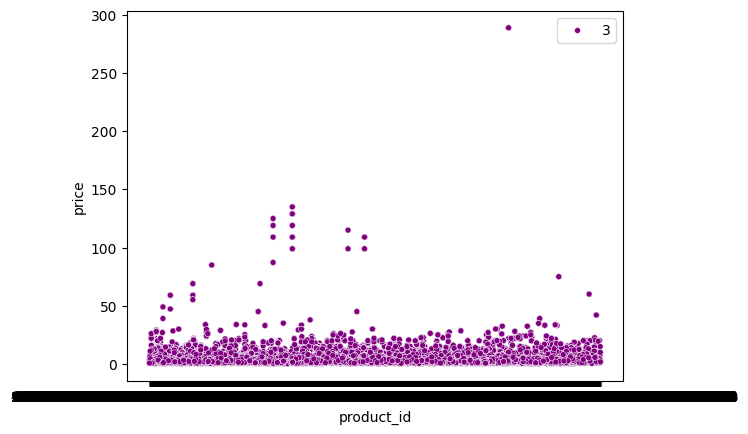

In [24]:
sns.scatterplot(data=df, x='product_id', y='price', size = 3, color = 'purple')

<Axes: xlabel='price', ylabel='count'>

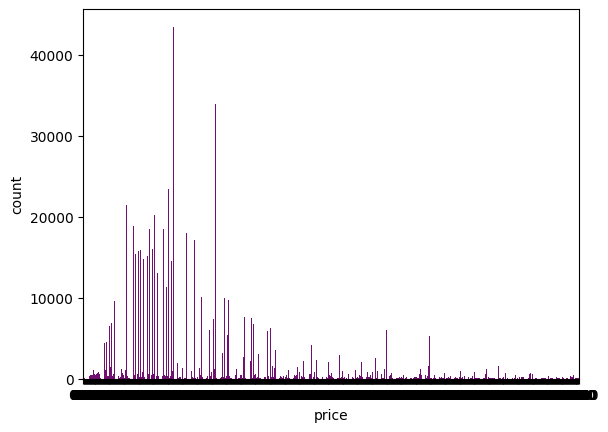

In [25]:
sns.countplot(data=df, x='price', color = 'purple')

<Axes: xlabel='price'>

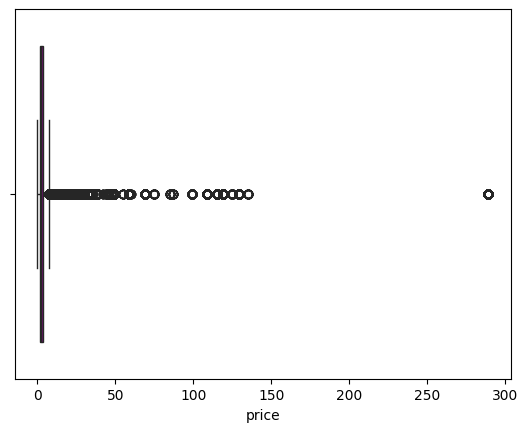

In [26]:
sns.boxplot(data=df, x='price', color = 'purple')

In [27]:
df.shape

(1264512, 11)

In [33]:
count_products = (df['price'] > df['reference_price']).sum()
print(count_products)

194374


# Análisis de productos


In [ ]:
df.columns

Index(['price', 'reference_price', 'product_id', 'reference_unit',
       'insert_date', 'url', 'supermarket', 'name', 'description', 'category',
       'subcategory'],
      dtype='object')

In [34]:
##¿Qué productos tienen más registros de precios?

# Count the number of price records for each product
product_price_counts = df['product_id'].value_counts()

# Show the top products with the most price records
print(product_price_counts.head())  # This will display the most frequent products (highest price records)


product_id
cd3f6bc51b2d934c1e46b0136ed62779    1384
5d2d1ed4575049c5cf5bea27ea6bad2c    1225
17c01da71d8e7a36cf32fd6f34f29625    1068
2f268ae7ec6b26d49f1f463c4dd49244    1020
b9c8b94b603a4b69e4454717730eab8c     930
Name: count, dtype: int64


In [ ]:
#¿Cuántos productos distintos hay en el dataset?

unique_products = df['name'].nunique()

print(unique_products)

10740


In [ ]:
# ¿Existen productos en el dataset de precios que no tienen información en el dataset de productos? NO, el df is empty, so they are all in both datasets

df_precios_not_in_productos = df_precios[df_precios['product_id'].isin(df_productos['product_id']) == False]

df_precios_not_in_productos


,price,reference_price,product_id,reference_unit,insert_date


In [ ]:
df.columns

Index(['price', 'reference_price', 'product_id', 'reference_unit',
       'insert_date', 'url', 'supermarket', 'name', 'description', 'category',
       'subcategory'],
      dtype='object')

# ¿Cuál es el precio medio por unidad de referencia de cada producto?

In [ ]:
av_price_unit_measure = df.groupby('reference_unit')['price'].mean()

av_price_unit_measure_desc = av_price_unit_measure.sort_values(ascending=False)

av_price_unit_measure_desc

reference_unit
lavado    6.620565
ud        4.301429
l         3.745480
kg        2.936545
m         2.168132
Name: price, dtype: float64